In [1]:
# import library
import pandas as pd

In [2]:
df=pd.read_csv("spam.csv")
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [5]:
df['Category'].value_counts()
 

Category
ham     4825
spam     747
Name: count, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.Message,df.Category,test_size=0.2,random_state=5)

In [7]:
x_train[2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
v= CountVectorizer()
x_train_count=v.fit_transform(x_train.values)
x_test_count= v.transform(x_test.values)
x_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(2, 7705))

In [10]:
len(x_train_count.toarray()[1]) # koto gula woord er sathe compare koreche 

7705

In [11]:
from sklearn.naive_bayes import MultinomialNB # normal data thakle gaussiannb
model= MultinomialNB()
model.fit(x_train_count, y_train)

MultinomialNB()

In [18]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test_count)  
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       970
        spam       0.98      0.96      0.97       145

    accuracy                           0.99      1115
   macro avg       0.99      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115



[[967   3]
 [  6 139]]


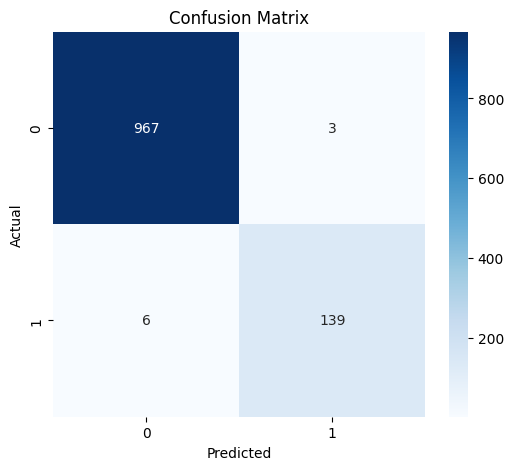

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print(cm)

# Optional: Visualize it with a heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [20]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this'
]

emails_count = v.transform(emails)
model.predict(emails_count)
# random likhlam check korar jonno

array(['ham', 'spam'], dtype='<U4')

In [21]:
emails_count= v.transform( emails)
model.predict(emails_count)

array(['ham', 'spam'], dtype='<U4')

In [25]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('model', MultinomialNB())
])

# ✅ Train pipeline on training data
pipe.fit(x_train, y_train)

# ✅ Predict on test data
y_pred = pipe.predict(x_test)

# ✅ Classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       970
        spam       0.98      0.96      0.97       145

    accuracy                           0.99      1115
   macro avg       0.99      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115

